In [808]:
import numpy as np
import pandas as pd

from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [809]:
def evaluate_preds(true_values, pred_values, save=False):
    """Оценка качества модели и график preds vs true"""
    
    print("R2:\t" + str(round(r2_score(true_values, pred_values), 3)) + "\n" +
          "RMSE:\t" + str(round(np.sqrt(mse(true_values, pred_values)), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3))
         )
    
    plt.figure(figsize=(8,8))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([0, 10000], [0, 10000], linestyle='--', color='black')  # диагональ, где true_values = pred_values
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    
    if save == True:
        plt.savefig(REPORTS_FILE_PATH + 'report.png')
    plt.show()

In [810]:
TRAIN_FILE_PATH = 'C:/Users/operator/Desktop/Обучение ИИ/Библиотеки Data science/Курсовой проект/train.csv'
TEST_FILE_PATH = 'C:/Users/operator/Desktop/Обучение ИИ/Библиотеки Data science/Курсовой проект/test.csv'

In [811]:
df = pd.read_csv(TRAIN_FILE_PATH)

df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,11809,27,3.0,115.027311,NaN,10.0,4,10.0,2014,0.075424,B,B,11,3097,0,NaN,0,0,B,305018.871089
1,3013,22,1.0,39.832524,23.169223,8.0,7,8.0,1966,0.118537,B,B,30,6207,1,1183.0,1,0,B,177734.553407
2,8215,1,3.0,78.342215,47.671972,10.0,2,17.0,1988,0.025609,B,B,33,5261,0,240.0,3,1,B,282078.720850
3,2352,1,1.0,40.409907,NaN,1.0,10,22.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,168106.007630
4,13866,94,2.0,64.285067,38.562517,9.0,16,16.0,1972,0.282798,B,B,33,8667,2,NaN,0,6,B,343995.102962


### 1. EDA

#### Визуализируем целевую переменную

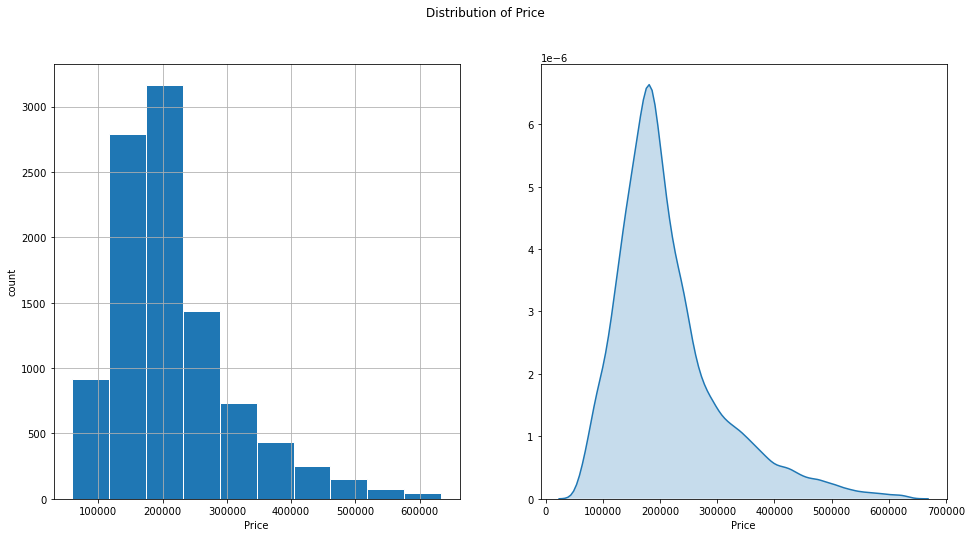

In [812]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
df['Price'].hist(ec='white')
plt.xlabel('Price')
plt.ylabel('count')

plt. subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')

plt.show()

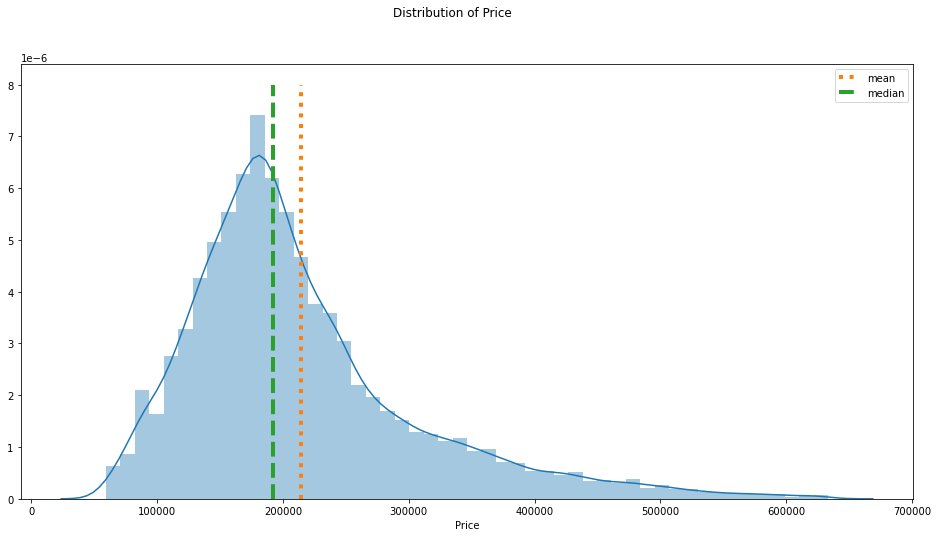

In [813]:
plt.figure(figsize = (16, 8))

sns.distplot(df['Price'], bins=50)

y = np.linspace(0, 0.000008, 10)

plt.plot([df['Price'].mean()] * 10, y, label='mean', linewidth=4, linestyle=':')
plt.plot([df['Price'].median()] * 10, y, label='median', linewidth=4, linestyle='--')
plt.legend()
plt.suptitle('Distribution of Price')

plt.show()

In [814]:
df = df.sample(frac=1)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1825,4619,88,3.0,86.511098,NaN,0.0,3,0.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,354578.955375
3540,5495,61,3.0,63.822747,48.568448,6.0,12,12.0,1982,0.300323,B,B,52,10311,6,NaN,1,9,B,222455.549300
3073,3666,27,1.0,47.075052,26.229078,1.0,15,15.0,2011,0.211401,B,B,9,1892,0,NaN,0,1,B,139239.461149
6647,6486,200,3.0,85.280389,58.447967,9.0,6,5.0,1960,0.000000,B,B,33,7425,1,NaN,2,5,B,402871.916317
2508,558,1,2.0,52.566496,NaN,1.0,17,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,177176.982029


### 2. Заполняем пропуски

### LifeSquare outliers

Найдем медианное значение жилой площади для квартир с разным количеством комнат 

In [815]:
median_1r = df['LifeSquare'][df['Rooms'] == 1].median()
median_2r = df['LifeSquare'][df['Rooms'] == 2].median()
median_3r = df['LifeSquare'][df['Rooms'] == 3].median()
median_4r = df['LifeSquare'][df['Rooms'] == 4].median()
median_5r = df['LifeSquare'][df['Rooms'] == 5].median()
median_1r, median_2r, median_3r, median_4r, median_5r

(21.66392883217304,
 32.5521342349919,
 46.96048008775956,
 64.94654758809416,
 80.45891031600135)

In [816]:
df.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


Заменяем пропуски жилой площади средними значениями жилой площади для 1, 2, 3, 4, 5-комнатных квартир

In [817]:
df['LifeSquare'][df['Rooms'] == 1] = df['LifeSquare'].fillna(median_1r)
df['LifeSquare'][df['Rooms'] == 2] = df['LifeSquare'].fillna(median_2r)
df['LifeSquare'][df['Rooms'] == 3] = df['LifeSquare'].fillna(median_3r)
df['LifeSquare'][df['Rooms'] == 4] = df['LifeSquare'].fillna(median_4r)
df['LifeSquare'][df['Rooms'] == 5] = df['LifeSquare'].fillna(median_5r)

Находим медианное значение общей площади квартир в соответствии с количеством комнат

In [818]:
median_total_1r = df['Square'][df['Rooms'] == 1].median()
median_total_2r = df['Square'][df['Rooms'] == 2].median()
median_total_3r = df['Square'][df['Rooms'] == 3].median()
median_total_4r = df['Square'][df['Rooms'] == 4].median()
median_total_5r = df['Square'][df['Rooms'] == 5].median()
median_total_1r, median_total_2r, median_total_3r, median_total_4r, median_total_5r

(40.40658991236909,
 55.84181213903055,
 77.41364294803941,
 98.66805357992513,
 116.08486083443316)

Находим квантиль 90% общей площади квартир для квартир с разным количеством комнат

In [819]:
square_q90_1r = df['Square'][df['Rooms'] == 1].quantile(0.9)
square_q90_2r = df['Square'][df['Rooms'] == 2].quantile(0.9)
square_q90_3r = df['Square'][df['Rooms'] == 3].quantile(0.9)
square_q90_4r = df['Square'][df['Rooms'] == 4].quantile(0.9)
square_q90_5r = df['Square'][df['Rooms'] == 5].quantile(0.9)
square_q90_6r = df['Square'][df['Rooms'] == 6].quantile(0.95)
square_q90_1r, square_q90_2r, square_q90_3r, square_q90_4r,square_q90_5r, square_q90_6r

(48.81461633107326,
 68.10279763102793,
 91.9307995860959,
 122.47246693203293,
 188.0466455597947,
 59.41433379627719)

По оставшимся пропускам в жилой площади на основе общей площади определяем количество комнат (от 1 до 5) и заполняем соответствующим средним значением

In [820]:
for i in df['Square'][df['LifeSquare'].isna()].index:
    if df.loc[i, 'Square'] < square_q90_1r:
        df.loc[i, 'LifeSquare'] = median_1r
        df.loc[i, 'Rooms'] = 1
    elif (df.loc[i, 'Square'] > square_q90_1r) and (df.loc[i, 'Square'] < square_q90_2r):
        df.loc[i, 'LifeSquare'] = median_2r
        df.loc[i, 'Rooms'] = 2
    elif (df.loc[i, 'Square'] > square_q90_2r) and (df.loc[i, 'Square'] < square_q90_3r):
        df.loc[i, 'LifeSquare'] = median_3r
        df.loc[i, 'Rooms'] = 3
    elif (df.loc[i, 'Square'] > square_q90_3r) and (df.loc[i, 'Square'] < square_q90_4r):
        df.loc[i, 'LifeSquare'] = median_4r
        df.loc[i, 'Rooms'] = 4
    elif (df.loc[i, 'Square'] > square_q90_4r) and (df.loc[i, 'Square'] < square_q90_5r):
        df.loc[i, 'LifeSquare'] = median_5r
        df.loc[i, 'Rooms'] = 5

Пропуски жилой площади заполнены

### Заполняем пропуски Healtcare1

Создадим подмодель, которая на основе известных данных обучится и будет прогнозировать значение Healtcare 1 для пропущенных наблюдений

In [821]:
df.replace({
    'Ecology_2': {'A': 0, 'B': 1}
    },
    inplace=True
)

df.replace({
    'Ecology_3': {'A': 0, 'B': 1}
    },
    inplace=True
)

df.replace({
    'Shops_2': {'A': 0, 'B': 1}
    },
    inplace=True
)

In [822]:
from sklearn.model_selection import train_test_split

Создаем трейновый и валидационный датасеты для обучения подмодели

In [823]:
X = df[['Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Shops_2']][df['Healthcare_1'].isna() == False]
y = df['Healthcare_1'][df['Healthcare_1'].isna() == False]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Обучаем модель catboost

In [824]:
from sklearn.metrics import r2_score, mean_squared_error as mse

Learning rate set to 0.050306
0:	learn: 989.4906755	total: 65.4ms	remaining: 1m 5s
1:	learn: 969.6492421	total: 88.8ms	remaining: 44.3s
2:	learn: 941.0604437	total: 114ms	remaining: 38s
3:	learn: 920.2715942	total: 122ms	remaining: 30.3s
4:	learn: 896.0497232	total: 161ms	remaining: 32s
5:	learn: 871.6171139	total: 178ms	remaining: 29.5s
6:	learn: 850.0946044	total: 189ms	remaining: 26.8s
7:	learn: 829.3079085	total: 210ms	remaining: 26.1s
8:	learn: 811.6108907	total: 233ms	remaining: 25.6s
9:	learn: 793.0854106	total: 241ms	remaining: 23.8s
10:	learn: 777.9272842	total: 248ms	remaining: 22.3s
11:	learn: 761.9131678	total: 255ms	remaining: 21s
12:	learn: 749.9882812	total: 271ms	remaining: 20.6s
13:	learn: 734.5639019	total: 279ms	remaining: 19.6s
14:	learn: 718.7527989	total: 287ms	remaining: 18.9s
15:	learn: 701.4951253	total: 295ms	remaining: 18.1s
16:	learn: 687.2759214	total: 303ms	remaining: 17.5s
17:	learn: 672.9407616	total: 310ms	remaining: 16.9s
18:	learn: 660.5871170	total: 

159:	learn: 97.8314138	total: 2.13s	remaining: 11.2s
160:	learn: 97.1308327	total: 2.14s	remaining: 11.2s
161:	learn: 96.1043741	total: 2.16s	remaining: 11.2s
162:	learn: 95.4356870	total: 2.17s	remaining: 11.2s
163:	learn: 94.1933154	total: 2.18s	remaining: 11.1s
164:	learn: 92.6155920	total: 2.21s	remaining: 11.2s
165:	learn: 91.4638162	total: 2.22s	remaining: 11.2s
166:	learn: 90.4754109	total: 2.23s	remaining: 11.1s
167:	learn: 89.7446182	total: 2.26s	remaining: 11.2s
168:	learn: 88.7074054	total: 2.27s	remaining: 11.2s
169:	learn: 87.4630756	total: 2.36s	remaining: 11.5s
170:	learn: 86.3624052	total: 2.39s	remaining: 11.6s
171:	learn: 85.3894373	total: 2.44s	remaining: 11.8s
172:	learn: 83.5441288	total: 2.49s	remaining: 11.9s
173:	learn: 82.8173727	total: 2.52s	remaining: 12s
174:	learn: 81.6487925	total: 2.53s	remaining: 11.9s
175:	learn: 80.4371521	total: 2.54s	remaining: 11.9s
176:	learn: 79.7413760	total: 2.55s	remaining: 11.9s
177:	learn: 78.6400961	total: 2.59s	remaining: 1

328:	learn: 19.1220280	total: 4.79s	remaining: 9.77s
329:	learn: 18.9949985	total: 4.8s	remaining: 9.75s
330:	learn: 18.5828722	total: 4.81s	remaining: 9.72s
331:	learn: 18.3757758	total: 4.82s	remaining: 9.7s
332:	learn: 18.1464212	total: 4.84s	remaining: 9.69s
333:	learn: 17.8802896	total: 4.85s	remaining: 9.67s
334:	learn: 17.7479765	total: 4.86s	remaining: 9.64s
335:	learn: 17.4199739	total: 4.88s	remaining: 9.65s
336:	learn: 17.2491812	total: 4.89s	remaining: 9.63s
337:	learn: 17.1515571	total: 4.9s	remaining: 9.6s
338:	learn: 17.0387936	total: 4.91s	remaining: 9.58s
339:	learn: 16.8995928	total: 4.93s	remaining: 9.57s
340:	learn: 16.7720396	total: 4.94s	remaining: 9.55s
341:	learn: 16.6534496	total: 4.95s	remaining: 9.53s
342:	learn: 16.4634637	total: 4.98s	remaining: 9.54s
343:	learn: 16.2986641	total: 4.99s	remaining: 9.52s
344:	learn: 16.1911422	total: 5s	remaining: 9.49s
345:	learn: 16.0060496	total: 5s	remaining: 9.46s
346:	learn: 15.8609607	total: 5.02s	remaining: 9.45s
347

491:	learn: 3.8776284	total: 6.64s	remaining: 6.85s
492:	learn: 3.8550158	total: 6.66s	remaining: 6.85s
493:	learn: 3.8239017	total: 6.67s	remaining: 6.83s
494:	learn: 3.8012225	total: 6.68s	remaining: 6.82s
495:	learn: 3.7674859	total: 6.69s	remaining: 6.8s
496:	learn: 3.7411537	total: 6.7s	remaining: 6.78s
497:	learn: 3.7036512	total: 6.72s	remaining: 6.77s
498:	learn: 3.6833833	total: 6.73s	remaining: 6.76s
499:	learn: 3.6419552	total: 6.74s	remaining: 6.74s
500:	learn: 3.6160910	total: 6.75s	remaining: 6.72s
501:	learn: 3.5818043	total: 6.76s	remaining: 6.71s
502:	learn: 3.5610948	total: 6.77s	remaining: 6.69s
503:	learn: 3.5282901	total: 6.79s	remaining: 6.68s
504:	learn: 3.5066156	total: 6.79s	remaining: 6.66s
505:	learn: 3.4652347	total: 6.8s	remaining: 6.64s
506:	learn: 3.4358116	total: 6.81s	remaining: 6.62s
507:	learn: 3.4113749	total: 6.82s	remaining: 6.61s
508:	learn: 3.3803131	total: 6.84s	remaining: 6.6s
509:	learn: 3.3434713	total: 6.85s	remaining: 6.58s
510:	learn: 3.31

661:	learn: 0.8773862	total: 8.25s	remaining: 4.21s
662:	learn: 0.8686167	total: 8.26s	remaining: 4.2s
663:	learn: 0.8609972	total: 8.26s	remaining: 4.18s
664:	learn: 0.8533998	total: 8.27s	remaining: 4.17s
665:	learn: 0.8477082	total: 8.28s	remaining: 4.15s
666:	learn: 0.8395871	total: 8.28s	remaining: 4.13s
667:	learn: 0.8314799	total: 8.29s	remaining: 4.12s
668:	learn: 0.8228841	total: 8.3s	remaining: 4.11s
669:	learn: 0.8172489	total: 8.31s	remaining: 4.09s
670:	learn: 0.8130367	total: 8.31s	remaining: 4.08s
671:	learn: 0.8037351	total: 8.32s	remaining: 4.06s
672:	learn: 0.7948422	total: 8.33s	remaining: 4.05s
673:	learn: 0.7875164	total: 8.34s	remaining: 4.03s
674:	learn: 0.7803287	total: 8.35s	remaining: 4.02s
675:	learn: 0.7764838	total: 8.35s	remaining: 4s
676:	learn: 0.7714160	total: 8.38s	remaining: 4s
677:	learn: 0.7662061	total: 8.38s	remaining: 3.98s
678:	learn: 0.7564118	total: 8.39s	remaining: 3.97s
679:	learn: 0.7489767	total: 8.4s	remaining: 3.95s
680:	learn: 0.7414653

821:	learn: 0.2263986	total: 10.3s	remaining: 2.22s
822:	learn: 0.2252753	total: 10.3s	remaining: 2.21s
823:	learn: 0.2227365	total: 10.3s	remaining: 2.2s
824:	learn: 0.2215423	total: 10.3s	remaining: 2.19s
825:	learn: 0.2201827	total: 10.3s	remaining: 2.17s
826:	learn: 0.2180644	total: 10.3s	remaining: 2.16s
827:	learn: 0.2164307	total: 10.3s	remaining: 2.15s
828:	learn: 0.2151310	total: 10.3s	remaining: 2.13s
829:	learn: 0.2133456	total: 10.3s	remaining: 2.12s
830:	learn: 0.2107770	total: 10.4s	remaining: 2.1s
831:	learn: 0.2097677	total: 10.4s	remaining: 2.09s
832:	learn: 0.2079714	total: 10.4s	remaining: 2.08s
833:	learn: 0.2063783	total: 10.4s	remaining: 2.07s
834:	learn: 0.2045282	total: 10.4s	remaining: 2.05s
835:	learn: 0.2024809	total: 10.4s	remaining: 2.04s
836:	learn: 0.1997004	total: 10.4s	remaining: 2.03s
837:	learn: 0.1987272	total: 10.4s	remaining: 2.01s
838:	learn: 0.1971863	total: 10.4s	remaining: 2s
839:	learn: 0.1961940	total: 10.4s	remaining: 1.99s
840:	learn: 0.194

982:	learn: 0.0590851	total: 12.5s	remaining: 216ms
983:	learn: 0.0584359	total: 12.5s	remaining: 203ms
984:	learn: 0.0582149	total: 12.5s	remaining: 190ms
985:	learn: 0.0576634	total: 12.5s	remaining: 177ms
986:	learn: 0.0570648	total: 12.5s	remaining: 165ms
987:	learn: 0.0566722	total: 12.5s	remaining: 152ms
988:	learn: 0.0561658	total: 12.5s	remaining: 139ms
989:	learn: 0.0557974	total: 12.5s	remaining: 127ms
990:	learn: 0.0552050	total: 12.6s	remaining: 114ms
991:	learn: 0.0547606	total: 12.6s	remaining: 101ms
992:	learn: 0.0543709	total: 12.6s	remaining: 88.6ms
993:	learn: 0.0536362	total: 12.6s	remaining: 76ms
994:	learn: 0.0533188	total: 12.6s	remaining: 63.3ms
995:	learn: 0.0520793	total: 12.6s	remaining: 50.6ms
996:	learn: 0.0516922	total: 12.6s	remaining: 37.9ms
997:	learn: 0.0514253	total: 12.6s	remaining: 25.3ms
998:	learn: 0.0508158	total: 12.6s	remaining: 12.7ms
999:	learn: 0.0503815	total: 12.7s	remaining: 0us
R2:	1.0
RMSE:	0.05
MSE:	0.003


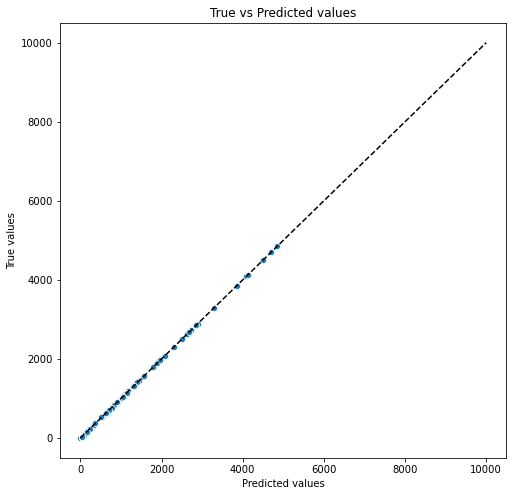

In [825]:
from catboost import CatBoostRegressor
cb_health1 = CatBoostRegressor()

cb_health1.fit(X_train, y_train)

y_train_preds = cb_health1.predict(X_train)

evaluate_preds(y_train, y_train_preds)

Проверяем на валидационном датасете

R2:	1.0
RMSE:	0.053
MSE:	0.003


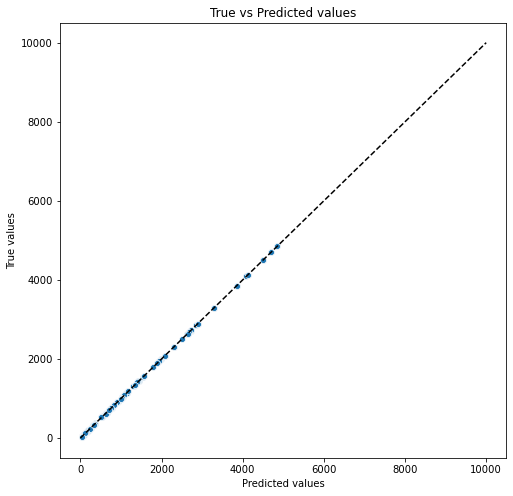

In [826]:
y_test_preds = cb_health1.predict(X_test)

evaluate_preds(y_test, y_test_preds)

100%-я точность предсказания 

Заполним пропущенные значения Healthcare 1

In [827]:
X_Heatchcare1_nan = df[['Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Shops_2']][df['Healthcare_1'].isna()]
X_Heatchcare1_nan

,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2
1825,0.127376,1,1,43,8429,3,3,9,1
3540,0.300323,1,1,52,10311,6,1,9,1
3073,0.211401,1,1,9,1892,0,0,1,1
6647,0.000000,1,1,33,7425,1,2,5,1
2508,0.007122,1,1,1,264,0,0,1,1
...,...,...,...,...,...,...,...,...,...
1352,0.004949,1,1,0,186,0,0,0,1
5403,0.007122,1,1,1,264,0,0,1,1
703,0.034656,1,1,0,168,0,0,0,1
9874,0.007122,1,1,1,264,0,0,1,1


In [828]:
y_Heatchcare1_nan = cb_health1.predict(X_Heatchcare1_nan)


y_Heatchcare1_nan = np.clip(y_Heatchcare1_nan, a_min=0, a_max=3320.7)

In [829]:
k = 0
for i in df.loc[df['Healthcare_1'].isna()].index:
    df.loc[i, 'Healthcare_1'] = y_Heatchcare1_nan[k]
    k += 1

Heathcare 1 заполнен

#### Визуализируем признаки, чтобы найти потенциальные выбросы

In [830]:
df_num_features = df.select_dtypes(include = ['int64', 'float64'])
df_num_features.drop(['Price', 'DistrictId', 'Id'], axis=1, inplace=True)

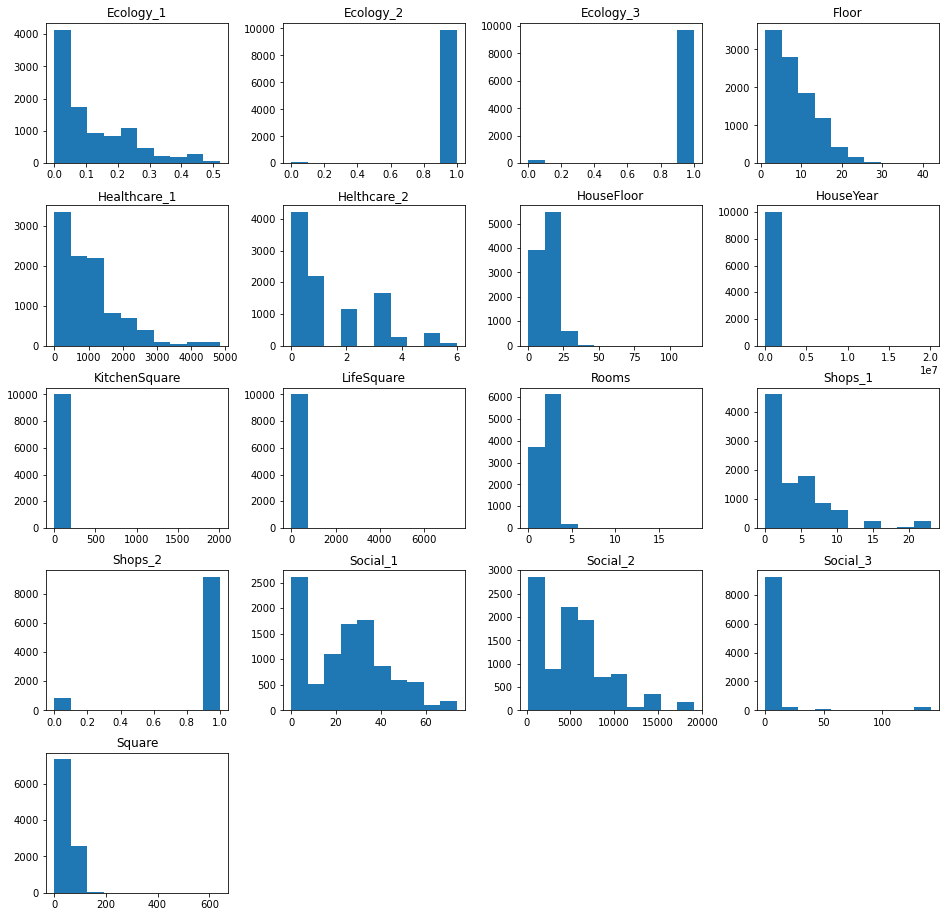

In [831]:
df_num_features.hist(figsize=(16,16), bins=10, grid=False);

### 3. Обработка выбросов

Выбросы HouseFloor

In [832]:
df.loc[df['HouseFloor'] > 48, 'HouseFloor'] = 48
df.loc[(df['HouseFloor'] == 0) & (df['Floor'] > 13), 'HouseFloor'] = df['Floor']
df.loc[(df['HouseFloor'] == 0) & (df['Floor'] <= 13), 'HouseFloor'] = 13

In [833]:
for i in df[(df['HouseFloor'] - df['Floor'] < 0)].index:
    df.loc[i, 'HouseFloor'] = df.loc[i, 'Floor']

Обработаем выбросы Square

In [834]:
for i in df[(df['Square'] < 13) | (df['Square'] > 300)].index:
    if df.loc[i, 'Rooms'] == 1:
        df.loc[i, 'Square'] = median_total_1r
    elif df.loc[i, 'Rooms'] == 2:
        df.loc[i, 'Square'] = median_total_2r
    elif df.loc[i, 'Rooms'] == 3:
        df.loc[i, 'Square'] = median_total_3r
    elif df.loc[i, 'Rooms'] == 4:
        df.loc[i, 'Square'] = median_total_4r
    elif df.loc[i, 'Rooms'] == 5:
        df.loc[i, 'Square'] = median_total_5r
    elif df.loc[i, 'Rooms'] == 0:
        df.loc[i, 'Square'] = median_total_1r

Выбросы KitchenSquare

Найдем медианные площади кухонь для 1,2,3,4,5-комнатных квартир

In [835]:
kitchen_sq_1r = df['KitchenSquare'][(df['KitchenSquare'] > 0) & (df['Rooms'] == 1)].median()
kitchen_sq_2r = df['KitchenSquare'][(df['KitchenSquare'] > 0) & (df['Rooms'] == 2)].median()
kitchen_sq_3r = df['KitchenSquare'][(df['KitchenSquare'] > 0) & (df['Rooms'] == 3)].median()
kitchen_sq_4r = df['KitchenSquare'][(df['KitchenSquare'] > 0) & (df['Rooms'] == 4)].median()
kitchen_sq_5r = df['KitchenSquare'][(df['KitchenSquare'] > 0) & (df['Rooms'] == 5)].median()
kitchen_sq_1r, kitchen_sq_2r, kitchen_sq_3r, kitchen_sq_4r, kitchen_sq_5r

(6.0, 6.0, 8.0, 9.0, 9.0)

In [836]:
for i in df[df['KitchenSquare'] <=0].index:
    if df.loc[i, 'Rooms'] == 1:
        df.loc[i, 'KitchenSquare'] = kitchen_sq_1r
    if df.loc[i, 'Rooms'] == 2:
        df.loc[i, 'KitchenSquare'] = kitchen_sq_2r
    if df.loc[i, 'Rooms'] == 3:
        df.loc[i, 'KitchenSquare'] = kitchen_sq_3r
    if df.loc[i, 'Rooms'] == 4:
        df.loc[i, 'KitchenSquare'] = kitchen_sq_4r
    if df.loc[i, 'Rooms'] == 5:
        df.loc[i, 'KitchenSquare'] = kitchen_sq_5r

Введем новый признак: Прочая площадь

In [837]:
df['EtcSquare'] = df['Square'] - df['LifeSquare'] - df['KitchenSquare']

Обработаем выбросы

In [838]:
for i in df[(df['EtcSquare'] < 0) & (df['KitchenSquare'] > 30)].index:
    if df.loc[i, 'Rooms'] == 1:
        df.loc[i, 'KitchenSquare'] = kitchen_sq_1r
    if df.loc[i, 'Rooms'] == 2:
        df.loc[i, 'KitchenSquare'] = kitchen_sq_2r
    if df.loc[i, 'Rooms'] == 3:
        df.loc[i, 'KitchenSquare'] = kitchen_sq_3r
    if df.loc[i, 'Rooms'] == 4:
        df.loc[i, 'KitchenSquare'] = kitchen_sq_4r
    if df.loc[i, 'Rooms'] == 5:
        df.loc[i, 'KitchenSquare'] = kitchen_sq_5r

Обработаем выбросы LifeSquare с учетом нового признака

In [839]:
for i in df[(df['EtcSquare'] < 0) & (df['KitchenSquare'] < 30)].index:
    df.loc[i, 'LifeSquare'] = df.loc[i, 'Square'] - df.loc[i, 'KitchenSquare']

Обновим значения признака Прочая площадь

In [840]:
df['EtcSquare'] = df['Square'] - df['LifeSquare'] - df['KitchenSquare']

#### Обратаем выбросы HouseYear

In [841]:
for i in df[df['HouseYear'] > 2020].index:
    df.loc[i, 'HouseYear'] = 2020

#### Обработаем выбросы Rooms

In [842]:
for i in df[(df['Rooms'] <= 0) | (df['Rooms'] > 5)].index:
    if df.loc[i, 'Square'] < square_q90_1r:
        df.loc[i, 'Rooms'] = 1
    elif (df.loc[i, 'Square'] > square_q90_1r) and (df.loc[i, 'Square'] < square_q90_2r):
        df.loc[i, 'Rooms'] = 2
    elif (df.loc[i, 'Square'] > square_q90_2r) and (df.loc[i, 'Square'] < square_q90_3r):
        df.loc[i, 'Rooms'] = 3
    elif (df.loc[i, 'Square'] > square_q90_3r) and (df.loc[i, 'Square'] < square_q90_4r):
        df.loc[i, 'Rooms'] = 4
    elif (df.loc[i, 'Square'] > square_q90_4r):
        df.loc[i, 'Rooms'] = 5

Введем новый признак Доля жилой площади

In [843]:
df['LifeSquareShare'] = df['LifeSquare'] / df['Square']

Определим среднюю долю жилой площади

In [844]:
median_ls_share = df['LifeSquareShare'].median()
median_ls_share

0.594085471853071

Обработаем выбросы Жилой площади исходя из нового признака

In [845]:
for i in df[df['LifeSquareShare'] < 0.2].index:
    df.loc[i, 'LifeSquare'] = df.loc[i, 'Square'] * median_ls_share

In [846]:
df['EtcSquare'] = df['Square'] - df['LifeSquare'] - df['KitchenSquare']

## 4. Новые признаки

Введем новый признак Цена за кв. метр

In [847]:
df['Price_per_square'] = df['Price'] / df['Square']

### Target encoding

На основе предыдущего признака создадим новый признак Средняя стоимость кв. метра в районе

In [848]:
district_sq_price = pd.DataFrame(df.groupby('DistrictId')['Price_per_square'].mean()).\
                                rename(columns={'Price_per_square':'Price_per_square_district'})

In [849]:
df = df.merge(district_sq_price, on='DistrictId', how='left')
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,EtcSquare,LifeSquareShare,Price_per_square,Price_per_square_district
0,4619,88,3.0,86.511098,46.960480,8.0,3,13.0,1977,0.127376,...,3,469.206671,3,9,1,354578.955375,31.550618,0.542826,4098.652832,4378.364743
1,5495,61,3.0,63.822747,48.568448,6.0,12,12.0,1982,0.300323,...,6,1327.124001,1,9,1,222455.549300,9.254300,0.760990,3485.521363,4344.943236
2,3666,27,1.0,47.075052,26.229078,1.0,15,15.0,2011,0.211401,...,0,85.396340,0,1,1,139239.461149,19.845974,0.557176,2957.818517,2765.119756
3,6486,200,3.0,85.280389,58.447967,9.0,6,6.0,1960,0.000000,...,1,878.895563,2,5,1,402871.916317,17.832422,0.685362,4724.086302,5247.428054
4,558,1,2.0,52.566496,32.552134,1.0,17,17.0,1977,0.007122,...,0,0.000000,0,1,1,177176.982029,19.014362,0.619256,3370.530553,3214.076711


средняя стоимость кв.м. по районам

In [850]:
median_dist_sq = district_sq_price['Price_per_square_district'].median()
median_dist_sq

4589.205295008205

### Построим корелляционную матрицу

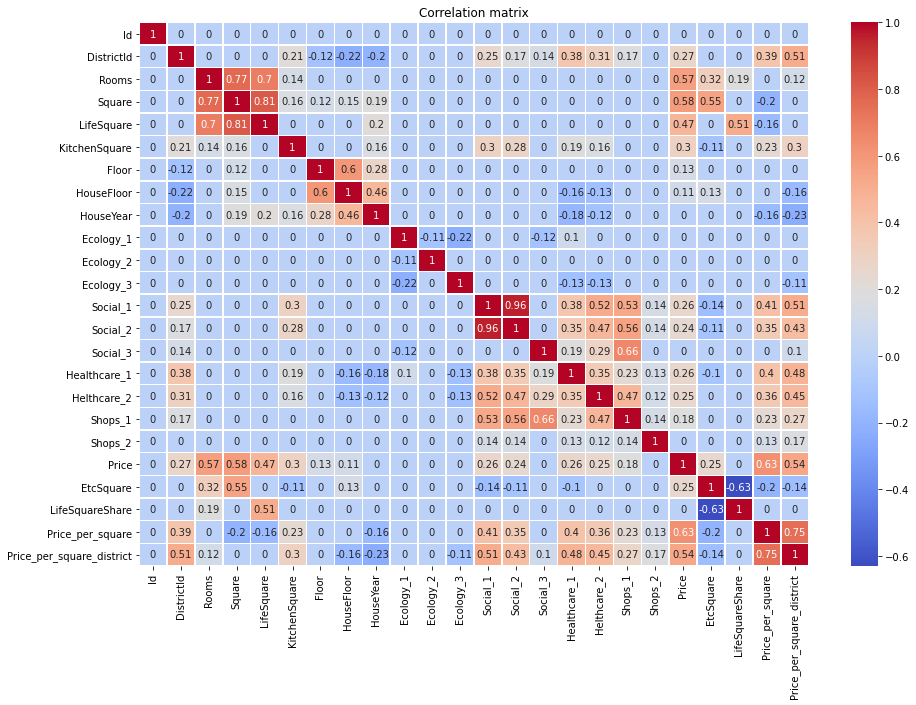

In [853]:
plt.figure(figsize=(15,10))

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.1] = 0

sns.heatmap(corr_matrix, annot=True, linewidth=0.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

## 5. Строим модель

In [854]:
X = df.drop(['Id','DistrictId', 'Price', 'Price_per_square', 'LifeSquareShare'], axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [855]:
cb = CatBoostRegressor()

cb.fit(X_train, y_train)
y_train_preds = cb.predict(X_train)


Learning rate set to 0.056513
0:	learn: 89543.4487321	total: 98.2ms	remaining: 1m 38s
1:	learn: 86534.1585287	total: 166ms	remaining: 1m 23s
2:	learn: 83583.0109973	total: 236ms	remaining: 1m 18s
3:	learn: 80911.1696470	total: 309ms	remaining: 1m 16s
4:	learn: 78519.2186643	total: 401ms	remaining: 1m 19s
5:	learn: 76233.6086384	total: 519ms	remaining: 1m 25s
6:	learn: 74010.9435681	total: 565ms	remaining: 1m 20s
7:	learn: 72028.1067669	total: 623ms	remaining: 1m 17s
8:	learn: 70196.2431977	total: 672ms	remaining: 1m 14s
9:	learn: 68505.5943894	total: 726ms	remaining: 1m 11s
10:	learn: 66976.2233638	total: 783ms	remaining: 1m 10s
11:	learn: 65522.2596079	total: 833ms	remaining: 1m 8s
12:	learn: 64230.0051259	total: 877ms	remaining: 1m 6s
13:	learn: 63002.0122270	total: 952ms	remaining: 1m 7s
14:	learn: 61829.3992587	total: 997ms	remaining: 1m 5s
15:	learn: 60743.1461676	total: 1.06s	remaining: 1m 5s
16:	learn: 59697.7309273	total: 1.12s	remaining: 1m 4s
17:	learn: 58769.6042291	total: 1

151:	learn: 41193.9527485	total: 5.18s	remaining: 28.9s
152:	learn: 41172.6555183	total: 5.21s	remaining: 28.9s
153:	learn: 41142.4768528	total: 5.23s	remaining: 28.7s
154:	learn: 41117.7598070	total: 5.25s	remaining: 28.6s
155:	learn: 41095.4312091	total: 5.27s	remaining: 28.5s
156:	learn: 41070.3478609	total: 5.29s	remaining: 28.4s
157:	learn: 41044.9183123	total: 5.31s	remaining: 28.3s
158:	learn: 41016.1222840	total: 5.33s	remaining: 28.2s
159:	learn: 40989.9254415	total: 5.34s	remaining: 28.1s
160:	learn: 40935.5760926	total: 5.36s	remaining: 27.9s
161:	learn: 40906.9800726	total: 5.38s	remaining: 27.8s
162:	learn: 40878.2241802	total: 5.4s	remaining: 27.7s
163:	learn: 40844.8765782	total: 5.42s	remaining: 27.6s
164:	learn: 40820.1480194	total: 5.44s	remaining: 27.5s
165:	learn: 40788.5088632	total: 5.46s	remaining: 27.4s
166:	learn: 40774.7975179	total: 5.47s	remaining: 27.3s
167:	learn: 40752.4300458	total: 5.49s	remaining: 27.2s
168:	learn: 40692.4224572	total: 5.51s	remaining:

301:	learn: 37491.8388317	total: 9.04s	remaining: 20.9s
302:	learn: 37461.8362028	total: 9.06s	remaining: 20.9s
303:	learn: 37437.3296463	total: 9.09s	remaining: 20.8s
304:	learn: 37405.1325386	total: 9.11s	remaining: 20.8s
305:	learn: 37384.0197377	total: 9.14s	remaining: 20.7s
306:	learn: 37362.5179754	total: 9.16s	remaining: 20.7s
307:	learn: 37353.9845433	total: 9.19s	remaining: 20.6s
308:	learn: 37334.9955479	total: 9.21s	remaining: 20.6s
309:	learn: 37316.0065682	total: 9.24s	remaining: 20.6s
310:	learn: 37305.7587600	total: 9.26s	remaining: 20.5s
311:	learn: 37264.4952259	total: 9.29s	remaining: 20.5s
312:	learn: 37238.4482399	total: 9.32s	remaining: 20.4s
313:	learn: 37222.7606240	total: 9.34s	remaining: 20.4s
314:	learn: 37187.7809096	total: 9.36s	remaining: 20.3s
315:	learn: 37164.3212411	total: 9.37s	remaining: 20.3s
316:	learn: 37146.3219789	total: 9.39s	remaining: 20.2s
317:	learn: 37133.1043719	total: 9.41s	remaining: 20.2s
318:	learn: 37118.1038882	total: 9.42s	remaining

454:	learn: 34595.2026793	total: 12.7s	remaining: 15.3s
455:	learn: 34568.1080159	total: 12.8s	remaining: 15.2s
456:	learn: 34552.4283887	total: 12.8s	remaining: 15.2s
457:	learn: 34538.2492933	total: 12.8s	remaining: 15.2s
458:	learn: 34520.3675171	total: 12.8s	remaining: 15.1s
459:	learn: 34503.2985298	total: 12.8s	remaining: 15.1s
460:	learn: 34494.4558353	total: 12.9s	remaining: 15s
461:	learn: 34469.9496227	total: 12.9s	remaining: 15s
462:	learn: 34452.2606859	total: 12.9s	remaining: 15s
463:	learn: 34434.8714288	total: 12.9s	remaining: 14.9s
464:	learn: 34419.5574688	total: 12.9s	remaining: 14.9s
465:	learn: 34392.1476115	total: 13s	remaining: 14.9s
466:	learn: 34385.4950451	total: 13s	remaining: 14.8s
467:	learn: 34374.1319782	total: 13s	remaining: 14.8s
468:	learn: 34365.5856810	total: 13s	remaining: 14.8s
469:	learn: 34355.0370822	total: 13.1s	remaining: 14.7s
470:	learn: 34339.0960882	total: 13.1s	remaining: 14.7s
471:	learn: 34329.0656874	total: 13.1s	remaining: 14.7s
472:	l

612:	learn: 32409.3847875	total: 16.2s	remaining: 10.2s
613:	learn: 32392.7656698	total: 16.3s	remaining: 10.2s
614:	learn: 32376.8961704	total: 16.3s	remaining: 10.2s
615:	learn: 32367.0531601	total: 16.3s	remaining: 10.2s
616:	learn: 32347.6038462	total: 16.3s	remaining: 10.1s
617:	learn: 32334.3697536	total: 16.3s	remaining: 10.1s
618:	learn: 32321.6615885	total: 16.3s	remaining: 10.1s
619:	learn: 32307.6533183	total: 16.4s	remaining: 10s
620:	learn: 32292.3470446	total: 16.4s	remaining: 9.99s
621:	learn: 32276.2551078	total: 16.4s	remaining: 9.96s
622:	learn: 32264.7745245	total: 16.4s	remaining: 9.92s
623:	learn: 32251.3196178	total: 16.4s	remaining: 9.89s
624:	learn: 32241.5515747	total: 16.4s	remaining: 9.86s
625:	learn: 32235.0357210	total: 16.5s	remaining: 9.83s
626:	learn: 32234.2593365	total: 16.5s	remaining: 9.8s
627:	learn: 32221.9718414	total: 16.5s	remaining: 9.76s
628:	learn: 32207.0865414	total: 16.5s	remaining: 9.73s
629:	learn: 32189.5281104	total: 16.5s	remaining: 9

762:	learn: 30610.4001680	total: 19s	remaining: 5.89s
763:	learn: 30603.7125524	total: 19s	remaining: 5.88s
764:	learn: 30597.3528147	total: 19s	remaining: 5.85s
765:	learn: 30578.0708395	total: 19.1s	remaining: 5.82s
766:	learn: 30562.7190172	total: 19.1s	remaining: 5.8s
767:	learn: 30549.1956358	total: 19.1s	remaining: 5.77s
768:	learn: 30548.0615162	total: 19.1s	remaining: 5.75s
769:	learn: 30532.6227188	total: 19.1s	remaining: 5.72s
770:	learn: 30525.8457079	total: 19.2s	remaining: 5.69s
771:	learn: 30512.8920040	total: 19.2s	remaining: 5.67s
772:	learn: 30496.0379401	total: 19.2s	remaining: 5.64s
773:	learn: 30479.8785830	total: 19.2s	remaining: 5.62s
774:	learn: 30479.4364247	total: 19.3s	remaining: 5.59s
775:	learn: 30470.7918161	total: 19.3s	remaining: 5.57s
776:	learn: 30459.6333291	total: 19.3s	remaining: 5.54s
777:	learn: 30454.5454218	total: 19.3s	remaining: 5.51s
778:	learn: 30436.4702923	total: 19.4s	remaining: 5.49s
779:	learn: 30421.7986460	total: 19.4s	remaining: 5.46s

910:	learn: 29041.2376650	total: 22s	remaining: 2.15s
911:	learn: 29031.6136573	total: 22.1s	remaining: 2.13s
912:	learn: 29021.6887177	total: 22.1s	remaining: 2.1s
913:	learn: 29007.6408988	total: 22.1s	remaining: 2.08s
914:	learn: 28999.7921919	total: 22.1s	remaining: 2.05s
915:	learn: 28984.8764054	total: 22.1s	remaining: 2.03s
916:	learn: 28974.3370213	total: 22.1s	remaining: 2s
917:	learn: 28964.8421718	total: 22.2s	remaining: 1.98s
918:	learn: 28964.1897774	total: 22.2s	remaining: 1.95s
919:	learn: 28953.7059057	total: 22.2s	remaining: 1.93s
920:	learn: 28945.0359582	total: 22.2s	remaining: 1.9s
921:	learn: 28934.8350320	total: 22.2s	remaining: 1.88s
922:	learn: 28928.8754071	total: 22.2s	remaining: 1.85s
923:	learn: 28919.6935626	total: 22.3s	remaining: 1.83s
924:	learn: 28907.3325212	total: 22.3s	remaining: 1.81s
925:	learn: 28896.6452359	total: 22.3s	remaining: 1.78s
926:	learn: 28880.1086904	total: 22.3s	remaining: 1.76s
927:	learn: 28874.9119208	total: 22.3s	remaining: 1.73s

Предсказываем на трейне

R2:	0.908
RMSE:	28208.582
MSE:	795724115.653


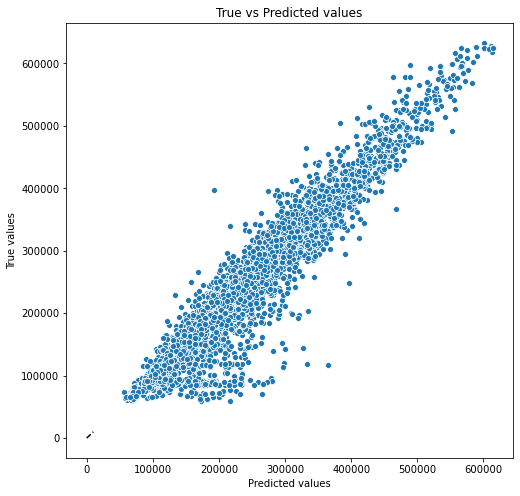

In [856]:
evaluate_preds(y_train, y_train_preds)

Предсказывем на валидационном датасете

R2:	0.745
RMSE:	46849.309
MSE:	2194857779.828


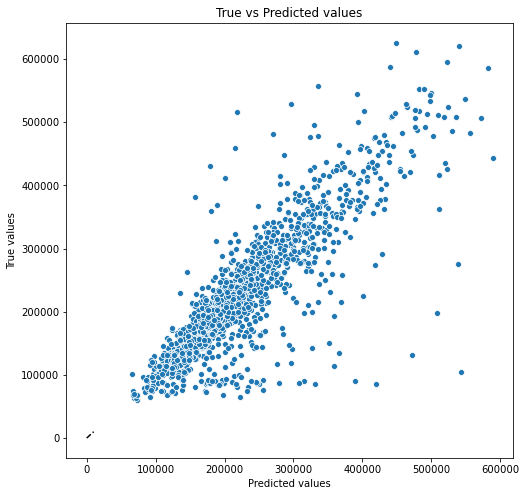

In [857]:
y_test_preds = cb.predict(X_test)


evaluate_preds(y_test, y_test_preds)

Важность признаков

In [858]:
feature_importances = pd.DataFrame(zip(X_train.columns, cb.feature_importances_), columns=['feature', 'importance'])

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

feature_importances

,feature,importance
1,Square,32.654583
18,Price_per_square_district,28.091165
6,HouseYear,6.489662
2,LifeSquare,3.694111
3,KitchenSquare,3.593298
5,HouseFloor,3.423958
13,Healthcare_1,3.238362
17,EtcSquare,3.068591
11,Social_2,2.793140
7,Ecology_1,2.589982


Кросс-валидация

In [860]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, GridSearchCV

In [ ]:
cv_score = cross_val_score(cb, X, y, scoring='r2', cv=KFold(n_splits=4, shuffle=True, random_state=21))
cv_score

Learning rate set to 0.055868
0:	learn: 89634.3838735	total: 87.9ms	remaining: 1m 27s
1:	learn: 86699.0425162	total: 141ms	remaining: 1m 10s
2:	learn: 83869.9030158	total: 191ms	remaining: 1m 3s
3:	learn: 81405.9930770	total: 261ms	remaining: 1m 4s
4:	learn: 79122.3804797	total: 345ms	remaining: 1m 8s
5:	learn: 76872.7283770	total: 439ms	remaining: 1m 12s
6:	learn: 74683.0711256	total: 530ms	remaining: 1m 15s
7:	learn: 72757.9059205	total: 706ms	remaining: 1m 27s
8:	learn: 71009.5382587	total: 843ms	remaining: 1m 32s
9:	learn: 69340.6420957	total: 901ms	remaining: 1m 29s
10:	learn: 67802.6713330	total: 1.13s	remaining: 1m 41s
11:	learn: 66439.4836815	total: 1.19s	remaining: 1m 38s
12:	learn: 65118.7111990	total: 1.24s	remaining: 1m 34s
13:	learn: 63882.0830840	total: 1.29s	remaining: 1m 30s
14:	learn: 62663.9961419	total: 1.34s	remaining: 1m 28s
15:	learn: 61594.8291872	total: 1.41s	remaining: 1m 26s
16:	learn: 60611.8113313	total: 1.47s	remaining: 1m 25s
17:	learn: 59624.1207581	total

156:	learn: 42080.3174807	total: 5.53s	remaining: 29.7s
157:	learn: 42067.1925310	total: 5.54s	remaining: 29.5s
158:	learn: 42030.5647127	total: 5.56s	remaining: 29.4s
159:	learn: 41999.4637315	total: 5.58s	remaining: 29.3s
160:	learn: 41950.1211176	total: 5.6s	remaining: 29.2s
161:	learn: 41929.1550463	total: 5.61s	remaining: 29s
162:	learn: 41889.1659499	total: 5.63s	remaining: 28.9s
163:	learn: 41864.9590484	total: 5.64s	remaining: 28.8s
164:	learn: 41835.9827742	total: 5.66s	remaining: 28.6s
165:	learn: 41813.0871392	total: 5.67s	remaining: 28.5s
166:	learn: 41793.9639597	total: 5.69s	remaining: 28.4s
167:	learn: 41782.5402376	total: 5.71s	remaining: 28.3s
168:	learn: 41765.2581648	total: 5.72s	remaining: 28.1s
169:	learn: 41752.4662424	total: 5.76s	remaining: 28.1s
170:	learn: 41725.7828239	total: 5.78s	remaining: 28s
171:	learn: 41700.2779989	total: 5.81s	remaining: 28s
172:	learn: 41685.7601370	total: 5.82s	remaining: 27.8s
173:	learn: 41644.2197259	total: 5.84s	remaining: 27.7s

305:	learn: 38336.7331303	total: 8.2s	remaining: 18.6s
306:	learn: 38309.0305298	total: 8.22s	remaining: 18.6s
307:	learn: 38284.6466818	total: 8.24s	remaining: 18.5s
308:	learn: 38269.6432432	total: 8.26s	remaining: 18.5s
309:	learn: 38237.9230424	total: 8.28s	remaining: 18.4s
310:	learn: 38221.9809901	total: 8.31s	remaining: 18.4s
311:	learn: 38202.3037785	total: 8.33s	remaining: 18.4s
312:	learn: 38170.4787426	total: 8.36s	remaining: 18.3s
313:	learn: 38148.9781691	total: 8.38s	remaining: 18.3s
314:	learn: 38132.3448833	total: 8.4s	remaining: 18.3s
315:	learn: 38126.9897187	total: 8.43s	remaining: 18.2s
316:	learn: 38113.5251290	total: 8.44s	remaining: 18.2s
317:	learn: 38083.0687996	total: 8.47s	remaining: 18.2s
318:	learn: 38047.3088632	total: 8.49s	remaining: 18.1s
319:	learn: 38013.7946776	total: 8.52s	remaining: 18.1s
320:	learn: 37999.7768448	total: 8.54s	remaining: 18.1s
321:	learn: 37959.7842707	total: 8.57s	remaining: 18s
322:	learn: 37942.7645117	total: 8.59s	remaining: 18

457:	learn: 35234.7663413	total: 11.3s	remaining: 13.4s
458:	learn: 35222.7212393	total: 11.3s	remaining: 13.3s
459:	learn: 35204.4253892	total: 11.3s	remaining: 13.3s
460:	learn: 35177.3663253	total: 11.3s	remaining: 13.3s
461:	learn: 35147.7565583	total: 11.4s	remaining: 13.2s
462:	learn: 35123.1736327	total: 11.4s	remaining: 13.2s
463:	learn: 35107.4197631	total: 11.4s	remaining: 13.2s
464:	learn: 35071.8414542	total: 11.4s	remaining: 13.1s
465:	learn: 35058.7376199	total: 11.4s	remaining: 13.1s
466:	learn: 35034.7466115	total: 11.4s	remaining: 13.1s
467:	learn: 35001.0110530	total: 11.5s	remaining: 13s
468:	learn: 34976.3661055	total: 11.5s	remaining: 13s
469:	learn: 34961.4921725	total: 11.5s	remaining: 12.9s
470:	learn: 34953.3774796	total: 11.5s	remaining: 12.9s
471:	learn: 34931.8548594	total: 11.5s	remaining: 12.9s
472:	learn: 34886.7688124	total: 11.5s	remaining: 12.8s
473:	learn: 34860.7311437	total: 11.6s	remaining: 12.8s
474:	learn: 34840.6021914	total: 11.6s	remaining: 12

610:	learn: 32639.6234925	total: 14.5s	remaining: 9.25s
611:	learn: 32634.1248321	total: 14.6s	remaining: 9.23s
612:	learn: 32625.3061872	total: 14.6s	remaining: 9.21s
613:	learn: 32604.1594718	total: 14.6s	remaining: 9.2s
614:	learn: 32587.4753302	total: 14.6s	remaining: 9.17s
615:	learn: 32576.9265111	total: 14.7s	remaining: 9.15s
616:	learn: 32566.8831124	total: 14.7s	remaining: 9.15s
617:	learn: 32553.4306703	total: 14.8s	remaining: 9.16s
618:	learn: 32544.6833955	total: 14.8s	remaining: 9.13s
619:	learn: 32532.3484232	total: 14.9s	remaining: 9.12s
620:	learn: 32519.2876290	total: 14.9s	remaining: 9.09s
621:	learn: 32508.3797064	total: 14.9s	remaining: 9.07s
622:	learn: 32494.0217484	total: 15s	remaining: 9.05s
623:	learn: 32480.9234790	total: 15s	remaining: 9.03s
624:	learn: 32474.2020120	total: 15s	remaining: 9.02s
625:	learn: 32463.4336179	total: 15.1s	remaining: 9.01s
626:	learn: 32442.3801887	total: 15.1s	remaining: 8.99s
627:	learn: 32427.8325112	total: 15.1s	remaining: 8.97s

757:	learn: 30788.8356844	total: 17.9s	remaining: 5.71s
758:	learn: 30779.2563528	total: 17.9s	remaining: 5.68s
759:	learn: 30765.4874518	total: 17.9s	remaining: 5.65s
760:	learn: 30755.9119749	total: 17.9s	remaining: 5.63s
761:	learn: 30750.5205263	total: 17.9s	remaining: 5.6s
762:	learn: 30742.4747602	total: 18s	remaining: 5.58s
763:	learn: 30730.4510610	total: 18s	remaining: 5.55s
764:	learn: 30720.1747413	total: 18s	remaining: 5.53s
765:	learn: 30714.3096821	total: 18s	remaining: 5.5s
766:	learn: 30698.1240716	total: 18s	remaining: 5.48s
767:	learn: 30685.6440918	total: 18.1s	remaining: 5.45s
768:	learn: 30678.6418120	total: 18.1s	remaining: 5.43s
769:	learn: 30666.6058970	total: 18.1s	remaining: 5.4s
770:	learn: 30660.0380142	total: 18.1s	remaining: 5.38s
771:	learn: 30648.9271369	total: 18.1s	remaining: 5.35s
772:	learn: 30624.9172843	total: 18.1s	remaining: 5.33s
773:	learn: 30613.6818024	total: 18.2s	remaining: 5.3s
774:	learn: 30602.5449760	total: 18.2s	remaining: 5.28s
775:	l

905:	learn: 29211.9396054	total: 21.4s	remaining: 2.22s
906:	learn: 29204.1557951	total: 21.4s	remaining: 2.19s
907:	learn: 29192.7467882	total: 21.4s	remaining: 2.17s
908:	learn: 29182.0420739	total: 21.5s	remaining: 2.15s
909:	learn: 29169.2946039	total: 21.5s	remaining: 2.13s
910:	learn: 29162.4341368	total: 21.6s	remaining: 2.11s
911:	learn: 29152.7578314	total: 21.6s	remaining: 2.09s
912:	learn: 29139.4943582	total: 21.7s	remaining: 2.06s
913:	learn: 29133.1237964	total: 21.7s	remaining: 2.04s
914:	learn: 29124.6721732	total: 21.8s	remaining: 2.02s
915:	learn: 29112.3301920	total: 21.8s	remaining: 2s
916:	learn: 29103.0531641	total: 21.8s	remaining: 1.98s
917:	learn: 29093.7476868	total: 21.9s	remaining: 1.96s
918:	learn: 29079.2579301	total: 21.9s	remaining: 1.93s
919:	learn: 29068.4607963	total: 22s	remaining: 1.91s
920:	learn: 29059.4844945	total: 22s	remaining: 1.89s
921:	learn: 29051.1542171	total: 22.1s	remaining: 1.87s
922:	learn: 29038.4156244	total: 22.1s	remaining: 1.84s

63:	learn: 45767.2537972	total: 1.12s	remaining: 16.4s
64:	learn: 45681.9464619	total: 1.14s	remaining: 16.4s
65:	learn: 45603.5872228	total: 1.15s	remaining: 16.3s
66:	learn: 45522.2736608	total: 1.17s	remaining: 16.3s
67:	learn: 45464.0154715	total: 1.19s	remaining: 16.2s
68:	learn: 45412.1645660	total: 1.2s	remaining: 16.2s
69:	learn: 45330.2982757	total: 1.21s	remaining: 16.1s
70:	learn: 45246.1091761	total: 1.23s	remaining: 16.1s
71:	learn: 45201.5487949	total: 1.24s	remaining: 16s
72:	learn: 45154.7448223	total: 1.26s	remaining: 16s
73:	learn: 45107.2878452	total: 1.28s	remaining: 16s
74:	learn: 45048.4219021	total: 1.3s	remaining: 16s
75:	learn: 45002.3919327	total: 1.31s	remaining: 16s
76:	learn: 44941.8906209	total: 1.33s	remaining: 15.9s
77:	learn: 44897.2320121	total: 1.34s	remaining: 15.9s
78:	learn: 44838.0848252	total: 1.36s	remaining: 15.8s
79:	learn: 44777.0176499	total: 1.37s	remaining: 15.8s
80:	learn: 44692.7483005	total: 1.39s	remaining: 15.7s
81:	learn: 44629.69974

217:	learn: 40406.0866528	total: 3.98s	remaining: 14.3s
218:	learn: 40376.0556262	total: 4s	remaining: 14.3s
219:	learn: 40362.5213438	total: 4.01s	remaining: 14.2s
220:	learn: 40332.4501452	total: 4.03s	remaining: 14.2s
221:	learn: 40311.8243782	total: 4.06s	remaining: 14.2s
222:	learn: 40265.9528396	total: 4.08s	remaining: 14.2s
223:	learn: 40244.7976659	total: 4.09s	remaining: 14.2s
224:	learn: 40217.4673635	total: 4.11s	remaining: 14.2s
225:	learn: 40204.9146600	total: 4.13s	remaining: 14.1s
226:	learn: 40173.7582280	total: 4.14s	remaining: 14.1s
227:	learn: 40149.9679162	total: 4.16s	remaining: 14.1s
228:	learn: 40123.3423361	total: 4.18s	remaining: 14.1s
229:	learn: 40117.0778296	total: 4.2s	remaining: 14.1s
230:	learn: 40103.0658517	total: 4.22s	remaining: 14.1s
231:	learn: 40093.1627763	total: 4.24s	remaining: 14s
232:	learn: 40073.3282439	total: 4.26s	remaining: 14s
233:	learn: 40045.9402434	total: 4.27s	remaining: 14s
234:	learn: 40024.3892539	total: 4.29s	remaining: 14s
235:

375:	learn: 36221.6064176	total: 7.2s	remaining: 11.9s
376:	learn: 36198.1137618	total: 7.21s	remaining: 11.9s
377:	learn: 36189.4754704	total: 7.23s	remaining: 11.9s
378:	learn: 36160.4179967	total: 7.24s	remaining: 11.9s
379:	learn: 36124.7710785	total: 7.26s	remaining: 11.8s
380:	learn: 36103.2743947	total: 7.27s	remaining: 11.8s
381:	learn: 36083.9559910	total: 7.29s	remaining: 11.8s
382:	learn: 36059.4857777	total: 7.3s	remaining: 11.8s
383:	learn: 36044.2490151	total: 7.32s	remaining: 11.7s
384:	learn: 36024.1683865	total: 7.34s	remaining: 11.7s
385:	learn: 35999.4517948	total: 7.35s	remaining: 11.7s
386:	learn: 35984.5771056	total: 7.37s	remaining: 11.7s
387:	learn: 35954.9241904	total: 7.38s	remaining: 11.6s
388:	learn: 35922.7053661	total: 7.4s	remaining: 11.6s
389:	learn: 35905.4470928	total: 7.41s	remaining: 11.6s
390:	learn: 35892.1649360	total: 7.43s	remaining: 11.6s
391:	learn: 35865.9506544	total: 7.45s	remaining: 11.5s
392:	learn: 35844.9420087	total: 7.47s	remaining: 1

529:	learn: 33334.6098098	total: 10.7s	remaining: 9.48s
530:	learn: 33329.6446815	total: 10.7s	remaining: 9.46s
531:	learn: 33313.5353844	total: 10.7s	remaining: 9.43s
532:	learn: 33294.8407168	total: 10.7s	remaining: 9.41s
533:	learn: 33283.6631930	total: 10.8s	remaining: 9.38s
534:	learn: 33275.3599018	total: 10.8s	remaining: 9.36s
535:	learn: 33257.3573115	total: 10.8s	remaining: 9.34s
536:	learn: 33237.1520416	total: 10.8s	remaining: 9.31s
537:	learn: 33222.8529407	total: 10.8s	remaining: 9.29s
538:	learn: 33209.3284766	total: 10.8s	remaining: 9.26s
539:	learn: 33195.6009427	total: 10.8s	remaining: 9.24s
540:	learn: 33183.4318299	total: 10.9s	remaining: 9.22s
541:	learn: 33150.4566438	total: 10.9s	remaining: 9.19s
542:	learn: 33126.1829743	total: 10.9s	remaining: 9.17s
543:	learn: 33111.1422273	total: 10.9s	remaining: 9.15s
544:	learn: 33082.9331445	total: 10.9s	remaining: 9.12s
545:	learn: 33066.8108172	total: 10.9s	remaining: 9.1s
546:	learn: 33050.5493554	total: 11s	remaining: 9

677:	learn: 31208.5007379	total: 12.9s	remaining: 6.15s
678:	learn: 31191.1571701	total: 13s	remaining: 6.13s
679:	learn: 31179.3298186	total: 13s	remaining: 6.11s
680:	learn: 31160.0907660	total: 13s	remaining: 6.08s
681:	learn: 31149.0308227	total: 13s	remaining: 6.06s
682:	learn: 31136.7402292	total: 13s	remaining: 6.04s
683:	learn: 31132.4858731	total: 13s	remaining: 6.02s
684:	learn: 31112.6666231	total: 13s	remaining: 6s
685:	learn: 31101.2096599	total: 13.1s	remaining: 5.98s
686:	learn: 31082.6653370	total: 13.1s	remaining: 5.96s
687:	learn: 31074.0152760	total: 13.1s	remaining: 5.94s
688:	learn: 31054.1499711	total: 13.1s	remaining: 5.92s
689:	learn: 31038.6294323	total: 13.1s	remaining: 5.9s
690:	learn: 31030.4653740	total: 13.1s	remaining: 5.87s
691:	learn: 31019.2445129	total: 13.2s	remaining: 5.85s
692:	learn: 30997.5986262	total: 13.2s	remaining: 5.83s
693:	learn: 30978.9381838	total: 13.2s	remaining: 5.81s
694:	learn: 30965.1564035	total: 13.2s	remaining: 5.79s
695:	learn

825:	learn: 29394.1674304	total: 15.9s	remaining: 3.34s
826:	learn: 29385.6717693	total: 15.9s	remaining: 3.33s
827:	learn: 29379.0763787	total: 15.9s	remaining: 3.31s
828:	learn: 29369.9914627	total: 15.9s	remaining: 3.29s
829:	learn: 29352.5228153	total: 16s	remaining: 3.27s
830:	learn: 29345.0352187	total: 16s	remaining: 3.25s
831:	learn: 29333.4203789	total: 16s	remaining: 3.23s
832:	learn: 29322.9961087	total: 16s	remaining: 3.21s
833:	learn: 29314.8008054	total: 16.1s	remaining: 3.19s
834:	learn: 29302.4669235	total: 16.1s	remaining: 3.17s
835:	learn: 29292.5419808	total: 16.1s	remaining: 3.16s
836:	learn: 29283.7219736	total: 16.1s	remaining: 3.14s
837:	learn: 29271.1386151	total: 16.1s	remaining: 3.12s
838:	learn: 29254.9645749	total: 16.1s	remaining: 3.1s
839:	learn: 29236.2699331	total: 16.1s	remaining: 3.08s
840:	learn: 29229.3331084	total: 16.2s	remaining: 3.06s
841:	learn: 29213.7021536	total: 16.2s	remaining: 3.04s
842:	learn: 29197.3419010	total: 16.2s	remaining: 3.02s
8

973:	learn: 27825.4212770	total: 19s	remaining: 507ms
974:	learn: 27818.3485469	total: 19s	remaining: 487ms
975:	learn: 27804.3267273	total: 19s	remaining: 468ms
976:	learn: 27799.0827537	total: 19s	remaining: 448ms
977:	learn: 27787.6630767	total: 19.1s	remaining: 429ms
978:	learn: 27773.1316973	total: 19.1s	remaining: 409ms
979:	learn: 27766.7785124	total: 19.1s	remaining: 390ms
980:	learn: 27761.3800201	total: 19.1s	remaining: 370ms
981:	learn: 27742.6027474	total: 19.1s	remaining: 351ms
982:	learn: 27733.4837392	total: 19.1s	remaining: 331ms
983:	learn: 27723.5901472	total: 19.2s	remaining: 312ms
984:	learn: 27716.9941788	total: 19.2s	remaining: 292ms
985:	learn: 27711.0252583	total: 19.2s	remaining: 273ms
986:	learn: 27701.3945926	total: 19.2s	remaining: 253ms
987:	learn: 27695.2805964	total: 19.2s	remaining: 234ms
988:	learn: 27683.5730636	total: 19.3s	remaining: 214ms
989:	learn: 27674.5586833	total: 19.3s	remaining: 195ms
990:	learn: 27667.5332931	total: 19.3s	remaining: 175ms


124:	learn: 42656.4001656	total: 4.81s	remaining: 33.6s
125:	learn: 42608.8574379	total: 4.82s	remaining: 33.5s
126:	learn: 42578.5528670	total: 4.86s	remaining: 33.4s
127:	learn: 42535.9815821	total: 4.88s	remaining: 33.3s
128:	learn: 42505.6165660	total: 4.94s	remaining: 33.3s
129:	learn: 42474.6520792	total: 4.97s	remaining: 33.3s
130:	learn: 42442.7566556	total: 5.05s	remaining: 33.5s
131:	learn: 42410.7845594	total: 5.08s	remaining: 33.4s
132:	learn: 42376.9070701	total: 5.17s	remaining: 33.7s
133:	learn: 42349.0515711	total: 5.18s	remaining: 33.5s
134:	learn: 42302.5888680	total: 5.22s	remaining: 33.5s
135:	learn: 42276.1341270	total: 5.3s	remaining: 33.7s
136:	learn: 42236.9147166	total: 5.32s	remaining: 33.5s
137:	learn: 42213.3659872	total: 5.34s	remaining: 33.3s
138:	learn: 42178.3648214	total: 5.42s	remaining: 33.6s
139:	learn: 42111.5313488	total: 5.44s	remaining: 33.4s
140:	learn: 42090.5912578	total: 5.49s	remaining: 33.5s
141:	learn: 42070.0477097	total: 5.51s	remaining:

In [ ]:
cv_score.mean()

## 6. Создаем класс, который прогнозирует цену недвижимости по новым данным

In [ ]:
class RealEstateForecast:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        """Средняя жилая площадь"""
        self.median_1r = 25.16
        self.median_2r = 35.97
        self.median_3r = 54.94
        self.median_4r = 65.67
        self.median_5r = 89.45
        """Средняя общая площадь"""
        self.median_total_1r = 41.32
        self.median_total_2r = 56.79
        self.median_total_3r = 76.90
        self.median_total_4r = 98.38
        self.median_total_5r = 122.61
        """Квантиль 90% - общая площадь"""
        self.square_q90_1r = 48.81
        self.square_q90_2r = 68.10
        self.square_q90_3r = 91.93
        self.square_q90_4r = 122.47
        self.square_q90_5r = 188.05
        """Средняя доля жилой площади"""
        self.median_ls_share = 0.6106
        """Площадь кухни"""
        self.kitchen_sq_1r = 6.0
        self.kitchen_sq_2r = 6.0
        self.kitchen_sq_3r = 8.0
        self.kitchen_sq_4r = 9.0
        self.kitchen_sq_5r = 9.0
        """Средние значения стоимости м2 по районам"""
        self.district_sq_price = district_sq_price 
        """Медианная стоимость м2 в районе"""
        self.median_dist_sq = 4589.20
        """Подмодель для Healtcare 1"""
        self.submodel = cb_health1
    
    def transform(self, X):
        """Трансформация данных"""
        
        #LifeSquare
        X['LifeSquare'][X['Rooms'] == 1] = X['LifeSquare'].fillna(self.median_1r)
        X['LifeSquare'][X['Rooms'] == 2] = X['LifeSquare'].fillna(self.median_2r)
        X['LifeSquare'][X['Rooms'] == 3] = X['LifeSquare'].fillna(self.median_3r)
        X['LifeSquare'][X['Rooms'] == 4] = X['LifeSquare'].fillna(self.median_4r)
        X['LifeSquare'][X['Rooms'] == 5] = X['LifeSquare'].fillna(self.median_5r)
        
        for i in X['Square'][X['LifeSquare'].isna()].index:
            if X.loc[i, 'Square'] < self.square_q90_1r:
                X.loc[i, 'LifeSquare'] = self.median_1r
                X.loc[i, 'Rooms'] = 1
            elif (X.loc[i, 'Square'] > self.square_q90_1r) and (X.loc[i, 'Square'] < self.square_q90_2r):
                X.loc[i, 'LifeSquare'] = self.median_2r
                X.loc[i, 'Rooms'] = 2
            elif (X.loc[i, 'Square'] > self.square_q90_2r) and (X.loc[i, 'Square'] < self.square_q90_3r):
                X.loc[i, 'LifeSquare'] = self.median_3r
                X.loc[i, 'Rooms'] = 3
            elif (X.loc[i, 'Square'] > self.square_q90_3r) and (X.loc[i, 'Square'] < self.square_q90_4r):
                X.loc[i, 'LifeSquare'] = self.median_4r
                X.loc[i, 'Rooms'] = 4
            elif (X.loc[i, 'Square'] > self.square_q90_4r) and (X.loc[i, 'Square'] < self.square_q90_5r):
                X.loc[i, 'LifeSquare'] = self.median_5r
                X.loc[i, 'Rooms'] = 5
                
        # Healtcare 1
        X.replace({
            'Ecology_2': {'A': 0, 'B': 1}
            },
            inplace=True
        )

        X.replace({
            'Ecology_3': {'A': 0, 'B': 1}
            },
            inplace=True
        )

        X.replace({
            'Shops_2': {'A': 0, 'B': 1}
            },
            inplace=True
        )
        
        X_Heatchcare1_nan = X[['Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Shops_2']][X['Healthcare_1'].isna()]
        
        y_Heatchcare1_nan = self.submodel.predict(X_Heatchcare1_nan)
        
        y_Heatchcare1_nan = np.clip(y_Heatchcare1_nan, a_min=0, a_max=3320.7)
        
        k = 0
        for i in X[X['Healthcare_1'].isna()].index:
            X.loc[i, 'Healthcare_1'] = y_Heatchcare1_nan[k]
            k += 1
        
        # HouseFloor      
        X.loc[X['HouseFloor'] > 48, 'HouseFloor'] = 48
        X.loc[(X['HouseFloor'] == 0) & (X['Floor'] > 13), 'HouseFloor'] = X['Floor']
        X.loc[(df['HouseFloor'] == 0) & (X['Floor'] <= 13), 'HouseFloor'] = 13

        for i in X[(X['HouseFloor'] - X['Floor'] < 0)].index:
            X.loc[i, 'HouseFloor'] = X.loc[i, 'Floor']
            
            
        # Square
        for i in X[(X['Square'] < 13) | (X['Square'] > 300)].index:
            if X.loc[i, 'Rooms'] == 1:
                X.loc[i, 'Square'] = self.median_total_1r
            elif X.loc[i, 'Rooms'] == 2:
                X.loc[i, 'Square'] = self.median_total_2r
            elif X.loc[i, 'Rooms'] == 3:
                X.loc[i, 'Square'] = self.median_total_3r
            elif X.loc[i, 'Rooms'] == 4:
                X.loc[i, 'Square'] = self.median_total_4r
            elif X.loc[i, 'Rooms'] == 5:
                X.loc[i, 'Square'] = self.median_total_5r
            elif X.loc[i, 'Rooms'] == 0:
                X.loc[i, 'Square'] = self.median_total_1r
                
        # KitchenSquare
        for i in X[X['KitchenSquare'] <=0].index:
            if X.loc[i, 'Rooms'] == 1:
                X.loc[i, 'KitchenSquare'] = self.kitchen_sq_1r
            elif X.loc[i, 'Rooms'] == 2:
                X.loc[i, 'KitchenSquare'] = self.kitchen_sq_2r
            elif X.loc[i, 'Rooms'] == 3:
                X.loc[i, 'KitchenSquare'] = self.kitchen_sq_3r
            elif X.loc[i, 'Rooms'] == 4:
                X.loc[i, 'KitchenSquare'] = self.kitchen_sq_4r
            elif X.loc[i, 'Rooms'] == 5:
                X.loc[i, 'KitchenSquare'] = self.kitchen_sq_5r
                
        # Признак Прочая площадь
        X['EtcSquare'] = X['Square'] - X['LifeSquare'] - X['KitchenSquare']
        
        # KitchenSquare продолжение
        for i in X[(X['EtcSquare'] < 0) & (X['KitchenSquare'] > 30)].index:
            if X.loc[i, 'Rooms'] == 1:
                X.loc[i, 'KitchenSquare'] = self.kitchen_sq_1r
            elif X.loc[i, 'Rooms'] == 2:
                X.loc[i, 'KitchenSquare'] = self.kitchen_sq_2r
            elif X.loc[i, 'Rooms'] == 3:
                X.loc[i, 'KitchenSquare'] = self.kitchen_sq_3r
            elif X.loc[i, 'Rooms'] == 4:
                X.loc[i, 'KitchenSquare'] = self.kitchen_sq_4r
            elif X.loc[i, 'Rooms'] == 5:
                X.loc[i, 'KitchenSquare'] = self.kitchen_sq_5r
                
        # Дополнительна обработка LifeSquare с учетом нового признака
        for i in X[(X['EtcSquare'] < 0) & (X['KitchenSquare'] < 30)].index:
            X.loc[i, 'LifeSquare'] = X.loc[i, 'Square'] - X.loc[i, 'KitchenSquare']
            
        X['EtcSquare'] = X['Square'] - X['LifeSquare'] - X['KitchenSquare']
        
        
        # HouseYear
        for i in X[X['HouseYear'] > 2020].index:
            X.loc[i, 'HouseYear'] = 2020
        
        # Rooms
        for i in X[(X['Rooms'] <= 0) | (X['Rooms'] > 5)].index:
            if X.loc[i, 'Square'] < self.square_q90_1r:
                X.loc[i, 'Rooms'] = 1
            elif (X.loc[i, 'Square'] > self.square_q90_1r) and (X.loc[i, 'Square'] < self.square_q90_2r):
                X.loc[i, 'Rooms'] = 2
            elif (X.loc[i, 'Square'] > self.square_q90_2r) and (X.loc[i, 'Square'] < self.square_q90_3r):
                X.loc[i, 'Rooms'] = 3
            elif (X.loc[i, 'Square'] > self.square_q90_3r) and (X.loc[i, 'Square'] < self.square_q90_4r):
                X.loc[i, 'Rooms'] = 4
            elif (X.loc[i, 'Square'] > self.square_q90_4r):
                X.loc[i, 'Rooms'] = 5
                
        # Новый признак LifeSquare_share
        X['LifeSquareShare'] = X['LifeSquare'] / X['Square']
        
        for i in X[X['LifeSquareShare'] < 0.2].index:
            X.loc[i, 'LifeSquare'] = X.loc[i, 'Square'] * self.median_ls_share

        # Новый признак Средняя стоимость м2 в районе
        X = X.merge(self.district_sq_price, on='DistrictId', how='left')
        
        district_price_nan = X[X['Price_per_square_district'].isna()].index
        
        for i in district_price_nan:
            X.loc[i, 'Price_per_square_district'] = self.median_dist_sq
        
        return X

### Делаем прогноз на тестовом датасете

In [ ]:
X = pd.read_csv(TEST_FILE_PATH)
X.head()

In [ ]:
X.shape

In [ ]:
preprocessor = RealEstateForecast()
X = preprocessor.transform(X)

X.describe()

In [ ]:
price_preds = cb.predict(X)
X['Price'] = price_preds

price_preds

In [ ]:
submission = X[['Id','Price']]    

In [ ]:
submission.to_csv('C:/Users/operator/Desktop/Обучение ИИ/Библиотеки Data science/my_submission.csv', index=False)